# 1. Install Dependencies and Setup

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove low quality images

In [4]:
import cv2
import imghdr

C:\Users\Kenneth\AppData\Local\Temp\ipykernel_23100\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
data_dir = 'data' 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

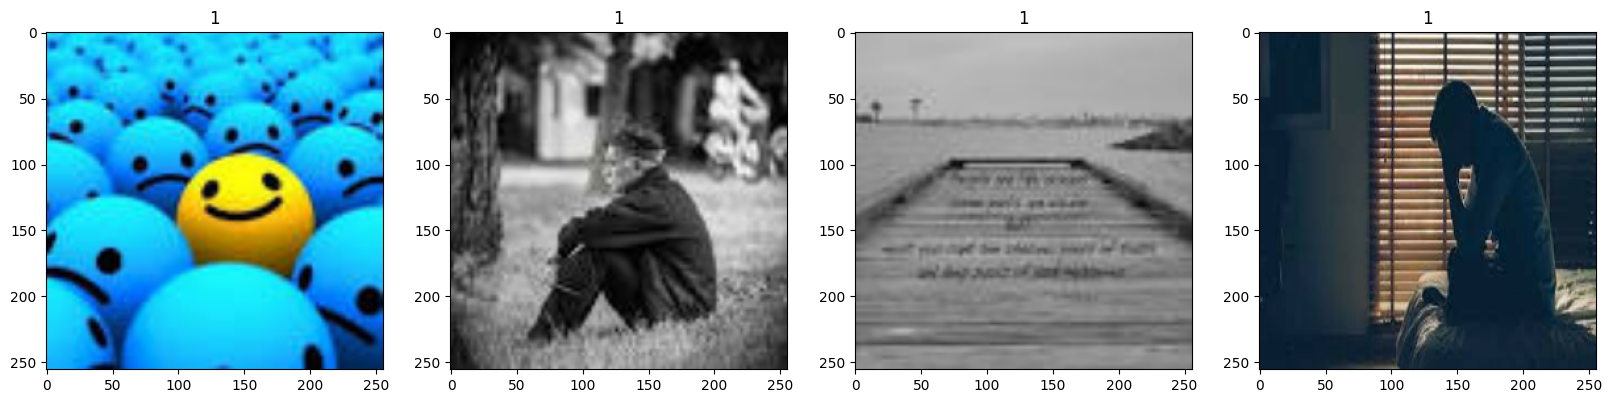

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[0.6666667 , 0.67058825, 0.6509804 ],
          [0.6671722 , 0.67109376, 0.6514859 ],
          [0.67143077, 0.67535233, 0.6557445 ],
          ...,
          [0.6557445 , 0.67535233, 0.6518229 ],
          [0.6514859 , 0.67109376, 0.64756435],
          [0.64722735, 0.6668352 , 0.6433058 ]],
 
         [[0.6666667 , 0.67058825, 0.6509804 ],
          [0.6671722 , 0.67109376, 0.6514859 ],
          [0.67143077, 0.67535233, 0.6557445 ],
          ...,
          [0.6579427 , 0.67755055, 0.65402114],
          [0.65368414, 0.673292  , 0.6497626 ],
          [0.64942557, 0.6690334 , 0.645504  ]],
 
         [[0.6666667 , 0.67058825, 0.6509804 ],
          [0.6671722 , 0.67109376, 0.6514859 ],
          [0.67143077, 0.67535233, 0.6557445 ],
          ...,
          [0.65966606, 0.6792739 , 0.6557445 ],
          [0.6554075 , 0.67501533, 0.6514859 ],
          [0.65215313, 0.671761  , 0.64823157]],
 
         ...,
 
         [[0.5265395 , 0.55791205, 0.56967676],
          [0.52653

# 5. Split Data

In [15]:
batch[0].shape

(32, 256, 256, 3)

In [16]:
len(data)

10

In [17]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [18]:
train_size

7

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [20]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [22]:
model = Sequential()

In [23]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [26]:
logdir='logs'

In [27]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [28]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20




7/7 [==============================] - 7s 487ms/step - loss: 0.7060 - accuracy: 0.5491 - val_loss: 0.6131 - val_accuracy: 0.7500
Epoch 2/20
7/7 [==============================] - 4s 419ms/step - loss: 0.5623 - accuracy: 0.7589 - val_loss: 0.4284 - val_accuracy: 0.8594
Epoch 3/20
7/7 [==============================] - 4s 438ms/step - loss: 0.4699 - accuracy: 0.7723 - val_loss: 0.3293 - val_accuracy: 0.8594
Epoch 4/20
7/7 [==============================] - 4s 408ms/step - loss: 0.3760 - accuracy: 0.8304 - val_loss: 0.3762 - val_accuracy: 0.8594
Epoch 5/20
7/7 [==============================] - 4s 429ms/step - loss: 0.2748 - accuracy: 0.9107 - val_loss: 0.2776 - val_accuracy: 0.9062
Epoch 6/20
7/7 [==============================] - 4s 427ms/step - loss: 0.2196 - accuracy: 0.9152 - val_loss: 0.1577 - val_accuracy: 0.9531
Epoch 7/20
7/7 [==============================] - 4s 422ms/step - loss: 0.1395 - accuracy: 0.9554 - val_loss: 0.1512 - val_accuracy: 0.9688
Epoch 8/20
7/7 [=============

# 8. Plot Performance

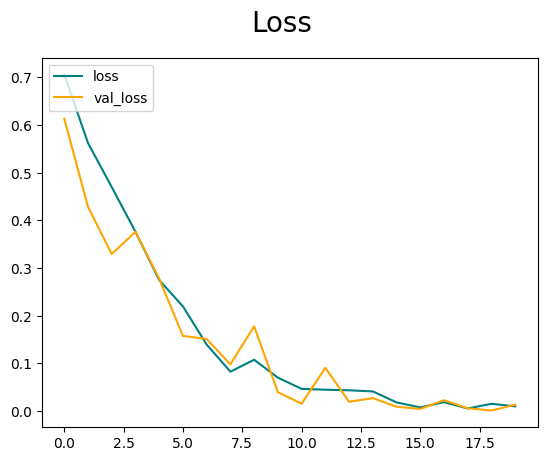

In [29]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

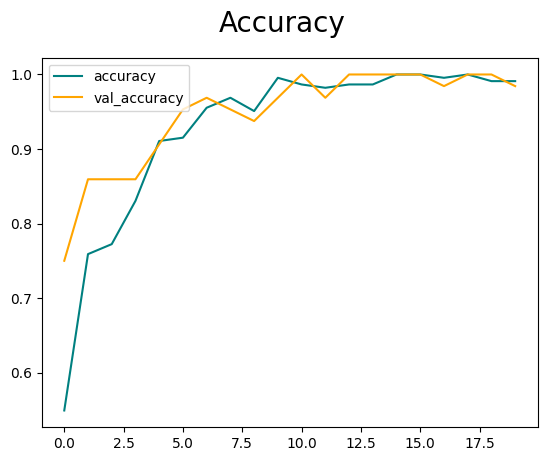

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [33]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 216ms/step


In [34]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [35]:
import cv2

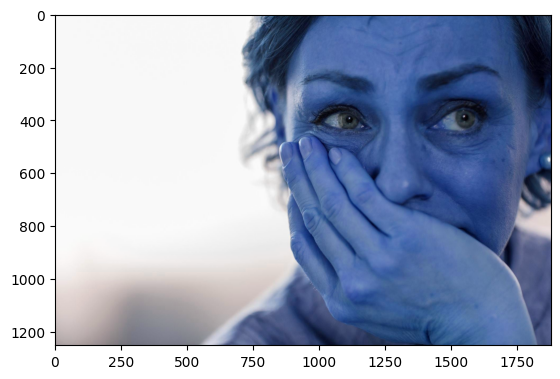

In [54]:
img = cv2.imread('data/sad/0x0.jpg')
plt.imshow(img)
plt.show()

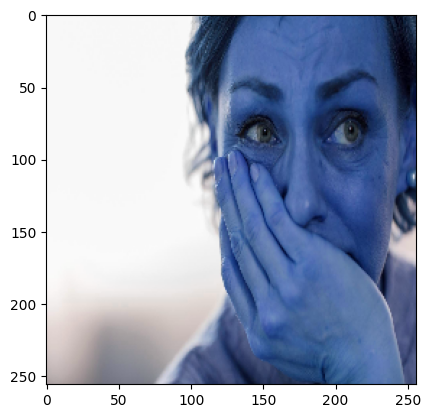

In [55]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [56]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 37ms/step


In [57]:
yhat

array([[0.9938907]], dtype=float32)

In [58]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.01972741]], dtype=float32)